# Подключение к Kaggle для загрузки данных прямо из браузера


 Загрузим файл *kaggle.json* , содержащий учетные данные для API, в среду выполнения Colab.

In [222]:
from google.colab import files

In [223]:
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# Загружаем Данные

Загрузим необходимые для прохождения данные


In [224]:
!kaggle competitions download -c urfu-engai-ml-2022-regression

urfu-engai-ml-2022-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


Распаковываем архив

In [225]:
!unzip urfu-engai-ml-2022-regression.zip

Archive:  urfu-engai-ml-2022-regression.zip
replace Submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Target.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Загружаем данные в Pandas

In [226]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [227]:
#загрузка тренировочных данных
DF_train = pd.read_csv('/content/Train.csv', delimiter = ',', index_col = 'index')
DF_train

,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
index,,,,,,,,,,,,,,,,,,
19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
28,EEA_3161-05-5,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
49,EEA_3161-01-1,2009,2009-01--2009-12,FRGR0178A,France,122.299437,71176346.0,5.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19889,EEA_31615-01-7,2009,2009-01--2009-12,FRFR2,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
19893,EEA_3161-03-3,2009,2009-01--2009-12,ES080MSPF01-03,Spain,93.677197,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
19894,EEA_3161-01-1,2009,2009-01--2009-12,ES080MSPF18-28,Spain,93.677197,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84


In [228]:
#загрузка тестовых данных
DF_test = pd.read_csv('/content/Test.csv', delimiter = ',', index_col = 'index')
DF_test

,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
index,,,,,,,,,,,,,,,,,,
202,EEA_3161-05-5,2009,2009-01--2009-12,FRGR0362,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
395,EEA_3161-03-3,2009,2009-01--2009-12,FRHR314,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
725,EEA_3161-02-2,2008,2008-01--2008-12,FRHR77,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
770,EEA_31615-01-7,2009,2009-01--2009-12,FRB1R723,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
771,EEA_3161-02-2,2009,2009-01--2009-12,FRB1R723,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19438,EEA_3161-02-2,2010,2010-01--2010-12,FRHR180,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
19462,EEA_3161-02-2,2010,2010-01--2010-12,FRHR228A,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
19625,EEA_3161-02-2,2009,2009-01--2009-12,UKSC020637,United Kingdom,274.708982,25867961.0,0.0,0.000000,16.7,2.2,3.5,28.2,18.9,20.2,0.0,2.7,27.25


In [229]:
#загрузка целевых значений для тренировочных данных
Target = pd.read_csv('/content/Target.csv', delimiter = ',', index_col = 'index')
Target

,polution
index,
19,0.693147
20,0.218495
27,0.693147
28,0.889405
49,0.510826
...,...
19889,1.112972
19893,0.139936
19894,0.154179


In [230]:
#загрузка файла плейсхолдера для итогового решения
Submission = pd.read_csv('/content/Submission.csv', delimiter = ',', index_col = 'index')
Submission

,polution
index,
202,1.086796
395,1.086796
725,1.086796
770,1.086796
771,1.086796
...,...
19438,1.086796
19462,1.086796
19625,1.086796


# Разведывательный анализ данных



Объединим в один ДатаФрейм тренировочные и тестовые данные, который пригодится нам в дальнейшем:

In [231]:
DF_total = pd.concat([DF_train, DF_test])

Добавим колонку polution к тренировочным данным для более полного анализа данных:

In [232]:
DF_train_full = DF_train.copy()
DF_train_full['polution'] = Target
DF_train_full

,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
index,,,,,,,,,,,,,,,,,,,
19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.218495
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147
28,EEA_3161-05-5,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.889405
49,EEA_3161-01-1,2009,2009-01--2009-12,FRGR0178A,France,122.299437,71176346.0,5.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.510826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19889,EEA_31615-01-7,2009,2009-01--2009-12,FRFR2,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,1.112972
19893,EEA_3161-03-3,2009,2009-01--2009-12,ES080MSPF01-03,Spain,93.677197,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.139936
19894,EEA_3161-01-1,2009,2009-01--2009-12,ES080MSPF18-28,Spain,93.677197,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.154179


Получим информацию о нашем тренировочном наборе данных:

In [233]:
DF_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 19 to 19915
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   code             1979 non-null   object 
 1   year             1979 non-null   int64  
 2   period           1979 non-null   object 
 3   id               1979 non-null   object 
 4   Country          1979 non-null   object 
 5   population       1979 non-null   float64
 6   tourists         1979 non-null   float64
 7   venue            1979 non-null   float64
 8   rate             1979 non-null   float64
 9   food             1979 non-null   float64
 10  glass            1979 non-null   float64
 11  metal            1979 non-null   float64
 12  other            1979 non-null   float64
 13  paper            1979 non-null   float64
 14  plastic          1979 non-null   float64
 15  leather          1979 non-null   float64
 16  green_waste      1979 non-null   float64
 17  waste_recycl

Проверим тренировочный набор данных на наличие дубликатов (!их нет!)

In [234]:
DF_train_full.duplicated().sum()

0

 Посчитаем число численных и категориальных колонок:

In [235]:
cat_columns = []
num_columns = []

for column_name in DF_train_full.columns:
    if (DF_train_full[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['code', 'period', 'id', 'Country'] 
 len =  4
numerical columns:	  ['year', 'population', 'tourists', 'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling', 'polution'] 
 len =  15


###Анализ числовых данных

Рассмотрим стастистику по числовым данным:

In [236]:
DF_train_full.describe()
#venue 
#rate 
#leather 
#green waste 
#Видно, что в приведенных выше колонках значения 75 перцентиля равняются нулю (возможно часть этих колонок нужно удалить или как-то преобразовать значения в них)

,year,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
count,1979.000000,1979.000000,1.979000e+03,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,2008.631127,135.378408,6.085057e+07,0.111673,8.735282,32.048873,8.986640,3.022840,24.775169,19.699151,10.014967,0.039616,0.452016,22.640623,1.042456
std,0.772611,60.808405,1.996584e+07,0.624864,25.879178,7.686625,2.686441,0.534799,5.175954,3.545121,3.599867,0.379301,1.557748,3.323414,0.641893
min,2006.000000,18.148547,5.300380e+05,0.000000,0.000000,14.180000,2.200000,1.380000,0.000000,6.100000,1.450000,0.000000,0.000000,0.760000,0.002497
25%,2008.000000,122.299437,5.094169e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,0.550070
50%,2009.000000,122.299437,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,0.870368
75%,2009.000000,122.299437,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.561003
max,2015.000000,377.379590,7.117635e+07,7.000000,87.158924,49.000000,21.400000,9.200000,44.050000,37.830000,20.200000,4.000000,15.330000,47.830000,3.323236


Рассмотрим распределение значений по каждому числовому признаку:

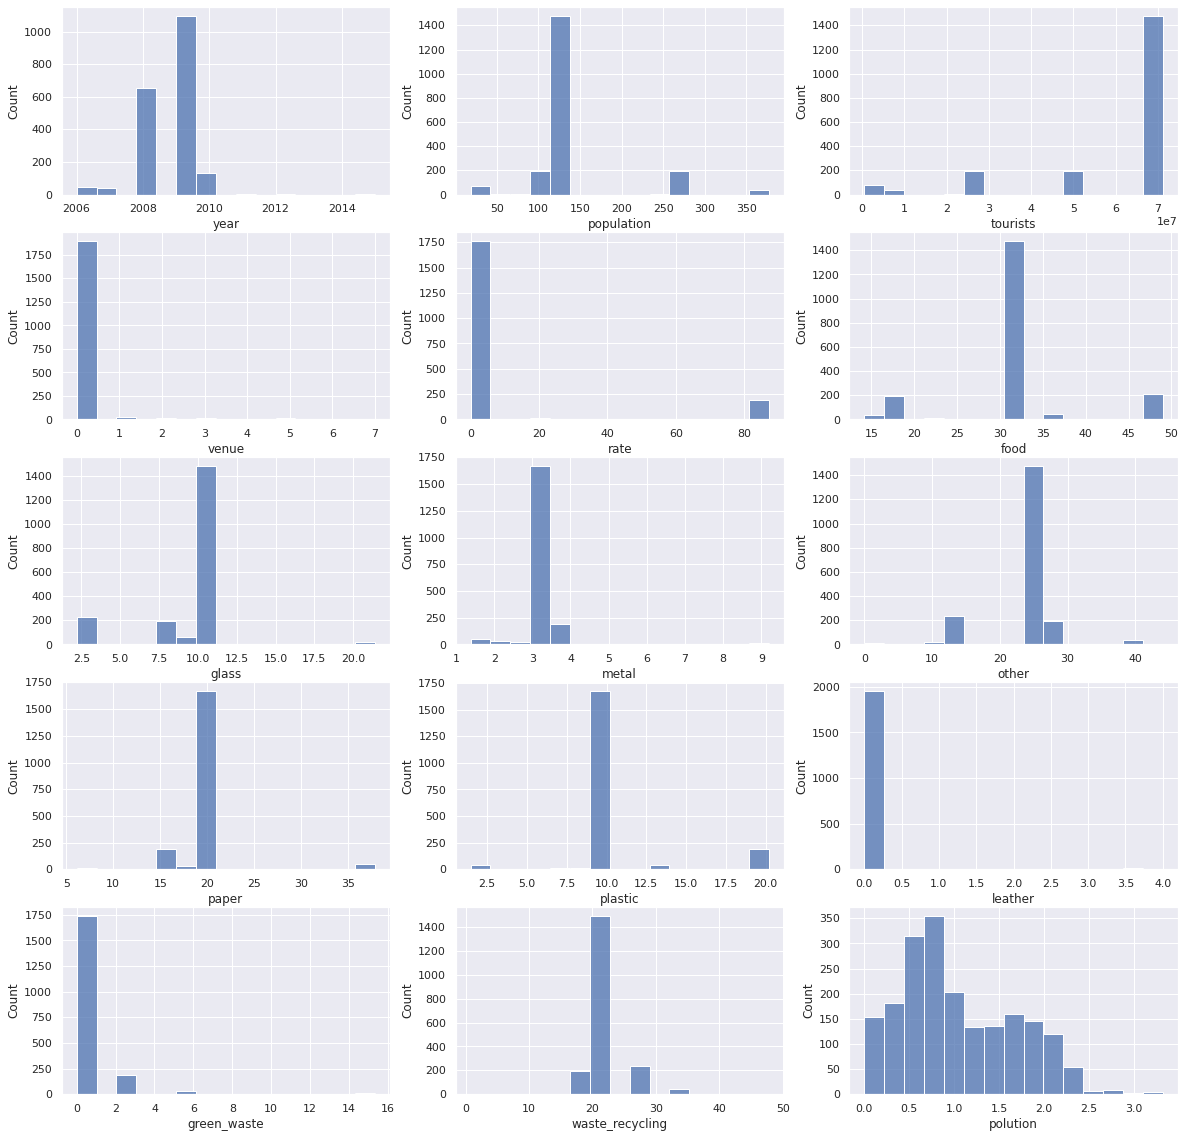

In [237]:
width = 3
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,20))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=DF_train_full,
            x=column_name, bins = 15);

Во многих гистограммах отсутствует большое количество столбцов, хуже всего с этим у venue, rate, leather и green waste.

Далее рассмотрим корреляцию числовых столбцов:

In [238]:
cm = sns.color_palette("vlag", as_cmap=True)

DF_train_full.corr().style.background_gradient(cmap = cm, vmin = -1 , vmax =1)

,year,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
year,1.000000,-0.412800,0.132751,-0.062286,0.247240,0.443651,0.327415,-0.171037,-0.240266,-0.021725,-0.429707,0.014008,-0.259481,-0.305375,-0.074210
population,-0.412800,1.000000,-0.435517,0.023243,-0.239989,-0.793378,-0.816516,0.060665,0.607628,-0.181184,0.889965,-0.088081,0.544438,0.636350,0.100029
tourists,0.132751,-0.435517,1.000000,-0.004159,-0.190285,0.268236,0.586081,-0.026153,0.196714,-0.116693,-0.463076,-0.283858,-0.634935,-0.516938,0.126834
venue,-0.062286,0.023243,-0.004159,1.000000,0.035017,0.001905,-0.040552,0.020352,-0.010616,-0.034054,0.042723,-0.018675,0.000002,-0.021712,-0.022175
rate,0.247240,-0.239989,-0.190285,0.035017,1.000000,0.739952,-0.089921,-0.022808,-0.700808,-0.467224,-0.096421,0.031483,-0.091336,-0.582026,-0.136771
food,0.443651,-0.793378,0.268236,0.001905,0.739952,1.000000,0.567159,-0.204677,-0.725303,-0.270066,-0.681400,0.140002,-0.536421,-0.800054,-0.112971
glass,0.327415,-0.816516,0.586081,-0.040552,-0.089921,0.567159,1.000000,-0.176876,-0.249098,0.013877,-0.837658,0.363399,-0.573615,-0.440904,0.011002
metal,-0.171037,0.060665,-0.026153,0.020352,-0.022808,-0.204677,-0.176876,1.000000,-0.181735,0.028275,0.276505,-0.144869,0.566480,0.051447,-0.018716
other,-0.240266,0.607628,0.196714,-0.010616,-0.700808,-0.725303,-0.249098,-0.181735,1.000000,-0.049474,0.394043,-0.261704,0.052210,0.448695,0.196187
paper,-0.021725,-0.181184,-0.116693,-0.034054,-0.467224,-0.270066,0.013877,0.028275,-0.049474,1.000000,-0.310956,-0.264008,0.158854,0.461342,-0.086761


Из корреляционной таблицы видно, что признаки venue, glass, metal и leather меньше всего воздействуют на polution.

В результате проделанного анализа числовых данных во многих признаках видны явные аномалии, но, перед тем как пытаться их устранить, я решил проверить работу модели с изначльными числовыми данными.

Далее рассмотрим категориальные данные.

###Анализ категориальных данных

Для анализа категориальных данных воспользуемся DF_total, для того чтобы можно было сразу изменять значения колонок, как  тренировочных, так и тестовых данных.

Посмотрим на количество уникальных значений в каждом категориальном признаке:

In [239]:
DF_total[cat_columns].nunique()

code         5
period      19
id         553
Country     11
dtype: int64

Сразу заметно, что признак id имеет слишком много уникальных значений.
Далее рассмотрим каждый признак по отдельности.

In [240]:
#id
counts = DF_total.id.value_counts()
counts

FRGR0543            13
FRGR0462A           13
FRDR182             12
FRGR0513            11
FRCR333             10
                    ..
FRDR506B             3
FRFR614              3
FRGR0368C            3
BERW06_MV35R         3
UKGB103023074790     3
Name: id, Length: 553, dtype: int64

In [241]:
print(counts[counts == 3].count(),
counts[counts == 4].count(),
counts[counts == 5].count(),
counts[counts == 6].count(),
counts[counts == 7].count(),
counts[counts == 8].count(),
counts[counts == 9].count(),
counts[counts == 10].count(),
counts[counts == 11].count(),
counts[counts == 12].count(),
counts[counts == 13].count())

279 150 61 29 13 11 5 1 1 1 2


In [242]:
counts.median()#значение медианы мало

3.0

Большая часть значений id повторяется меньше 5 раз, и как бы я ни пытался разделить значения по категориям, точность модели была меньше, чем без разделения, поэтому оставляем колонку id как есть. 



In [243]:
#code
counts2 = DF_total.code.value_counts()
counts2

EEA_3161-02-2     622
EEA_31615-01-7    475
EEA_3161-05-5     440
EEA_3161-01-1     386
EEA_3161-03-3     276
Name: code, dtype: int64

In [244]:
counts2.median()#хорошее значение медианы

440.0

Количество повторений уникальных значений признака code довольно близко, с этим признаком ввсё хорошо.  

In [245]:
#period
counts3 = DF_total.period.value_counts()
counts3 #меньше 25 other period

2009-01--2009-12          1194
2008-01--2008-12           699
2010-01--2010-12           137
2006-01--2006-12            57
2007-01--2007-12            41
2009-06--2009-08            10
2008-12--2009-02             9
2007-12--2008-02             8
2009-04--2009-10             7
2008-09--2008-11             6
2009-12--2010-02             6
2008-06--2008-08             5
2009-03--2009-05             4
2010-06--2010-08             4
2009-09--2009-11             4
2015-01-01--2015-12-31       3
2012-01--2012-12             2
2011-01--2011-12             2
2008-03--2008-05             1
Name: period, dtype: int64

In [246]:
counts3.median()

6.0

In [247]:
rare3 = counts3[counts3.values < 25]
DF_total['period'] = DF_total['period'].replace(rare3.index.values, 'Other periods')
DF_total.period.value_counts()

2009-01--2009-12    1194
2008-01--2008-12     699
2010-01--2010-12     137
Other periods         71
2006-01--2006-12      57
2007-01--2007-12      41
Name: period, dtype: int64

В признаке period заменили редковстречаемые значения(<25) на значение Other periods, теперь количество повторений уникальных признаков довольно близко.

In [248]:
#Country
counts4 = DF_total.Country.value_counts()
counts4 #меньше 25 rare country

France            1636
Spain              221
United Kingdom     214
Finland             48
Belgium             36
Latvia              16
Sweden              10
Germany              6
Lithuania            6
Serbia               3
Luxembourg           3
Name: Country, dtype: int64

In [249]:
counts4.median()

16.0

In [250]:
rare4 = counts4[counts4.values < 25]
DF_total['Country'] = DF_total['Country'].replace(rare4.index.values, 'Rare countries')
DF_total.Country.value_counts()

France            1636
Spain              221
United Kingdom     214
Finland             48
Rare countries      44
Belgium             36
Name: Country, dtype: int64

Аналогично period, в признаке Country заменили значения повторяющиеся <25 раз на Rare countries

let's try

ванхотэнкодинг

In [251]:
 from sklearn.preprocessing import OneHotEncoder

Создаем копию DF_total и применяем к ней onehotencoding

In [252]:
DF_total_ohe = DF_total.copy()
DF_total_ohe = pd.get_dummies(DF_total_ohe)
DF_total_ohe.tail()

,year,population,tourists,venue,rate,food,glass,metal,other,paper,...,id_UKSC023000,id_UKSC023032,id_UKSC023265,id_UKSC023346,Country_Belgium,Country_Finland,Country_France,Country_Rare countries,Country_Spain,Country_United Kingdom
index,,,,,,,,,,,,,,,,,,,,,
19438,2010,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,...,0,0,0,0,0,0,1,0,0,0
19462,2010,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,...,0,0,0,0,0,0,1,0,0,0
19625,2009,274.708982,25867961.0,0.0,0.000000,16.7,2.2,3.5,28.2,18.9,...,0,0,0,0,0,0,0,0,0,1
19690,2010,93.677197,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,...,0,0,0,0,0,0,0,0,1,0
19914,2015,93.677197,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,...,0,0,0,0,0,0,0,0,1,0


# Линейная регрессия:

Загружаем модель линейной регрессии и функции из библиотеки sklearn

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler

### Разбиваем данные обратно на Тренировочную и Тестовую


In [254]:
train = DF_total_ohe.iloc[0:DF_train.shape[0],:]
test = DF_total_ohe.iloc[DF_train.shape[0]:,:]
train.head()

,year,population,tourists,venue,rate,food,glass,metal,other,paper,...,id_UKSC023000,id_UKSC023032,id_UKSC023265,id_UKSC023346,Country_Belgium,Country_Finland,Country_France,Country_Rare countries,Country_Spain,Country_United Kingdom
index,,,,,,,,,,,,,,,,,,,,,
19,2009,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,...,0,0,0,0,0,0,1,0,0,0
20,2009,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,...,0,0,0,0,0,0,1,0,0,0
27,2009,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,...,0,0,0,0,0,0,1,0,0,0
28,2009,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,...,0,0,0,0,0,0,1,0,0,0
49,2009,122.299437,71176346.0,5.0,0.0,32.0,10.0,3.0,26.0,20.0,...,0,0,0,0,0,0,1,0,0,0


In [255]:
DF_train.shape[0], train.shape[0], DF_test.shape[0], test.shape[0], 

(1979, 1979, 220, 220)

### Перераспределим колонки после one-hot-encoding:

In [256]:
cat_columns = []
num_columns = []

for column_name in DF_total_ohe.columns:
    if (DF_total_ohe[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  [] 
 len =  0
numerical columns:	  ['year', 'population', 'tourists', 'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling', 'code_EEA_3161-01-1', 'code_EEA_3161-02-2', 'code_EEA_3161-03-3', 'code_EEA_3161-05-5', 'code_EEA_31615-01-7', 'period_2006-01--2006-12', 'period_2007-01--2007-12', 'period_2008-01--2008-12', 'period_2009-01--2009-12', 'period_2010-01--2010-12', 'period_Other periods', 'id_BERW06_AM17R', 'id_BERW06_LE14R', 'id_BERW06_ML06R', 'id_BERW06_ML07R', 'id_BERW06_ML12R', 'id_BERW06_MV31R', 'id_BERW06_MV35R', 'id_BERW06_OU11R', 'id_BERW06_SC09R', 'id_BERW06_VE18R', 'id_ES014MSPFES-014-MR-122-000-02-00', 'id_ES014MSPFES-014-MR-204-000-05-00', 'id_ES014MSPFES-014-NR-111-025-02-02', 'id_ES014MSPFES-014-NR-163-000-02-00', 'id_ES014MSPFES-014-NR-204-000-03-00', 'id_ES014MSPFES-014-NR-204-000-04-02', 'id_ES014MSPFES-014-NR-244-000-05-01', 'id_ES017MSPFES111R040010', 'id_ES017MSPFES111R042010', '

### Разбиваем тренировочные данные на тренировочную и валидационную

In [257]:
X_train = train.values
X_test = test.values

y_train = Target['polution'].values.ravel()


In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42)
#нормализацию решил не проводить, т.к. без неё метрика на кеггле увеличилась
print(X_train) 

[[2.00900000e+03 1.22299437e+02 7.11763460e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00900000e+03 1.22299437e+02 7.11763460e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00900000e+03 1.22299437e+02 7.11763460e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.00900000e+03 9.36771974e+01 5.09416920e+07 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.00900000e+03 1.22299437e+02 7.11763460e+07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00900000e+03 9.36771974e+01 5.09416920e+07 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


###Применение линейной регрессии

In [260]:
LR = LinearRegression(fit_intercept=True)

LR.fit(X_train, y_train)

B0=LR.intercept_
B=LR.coef_

line='{:.2f}'.format(B0)
sign=['+','-']

features_names = train.columns
for p,(fn,b) in enumerate(zip(features_names,B)):
  line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')
#веса не стал иллюстрировать из-за слишком большого количества признаков

Решение
-108.62+0.05*year+0.01*population+0.00*tourists+0.01*venue-0.01*rate+0.07*food-0.01*glass-0.00*metal-0.01*other-0.02*paper+0.01*plastic+0.01*leather+0.06*green_waste+0.02*waste_recycling-0.37*code_EEA_3161-01-1+0.22*code_EEA_3161-02-2-0.53*code_EEA_3161-03-3+0.25*code_EEA_3161-05-5+0.43*code_EEA_31615-01-7+0.13*period_2006-01--2006-12+0.06*period_2007-01--2007-12-0.04*period_2008-01--2008-12-0.12*period_2009-01--2009-12-0.12*period_2010-01--2010-12+0.10*period_Other periods-0.13*id_BERW06_AM17R-0.24*id_BERW06_LE14R-0.01*id_BERW06_ML06R+0.29*id_BERW06_ML07R+0.00*id_BERW06_ML12R+0.08*id_BERW06_MV31R+0.00*id_BERW06_MV35R-0.11*id_BERW06_OU11R-0.45*id_BERW06_SC09R+0.01*id_BERW06_VE18R-0.07*id_ES014MSPFES-014-MR-122-000-02-00-0.48*id_ES014MSPFES-014-MR-204-000-05-00+0.10*id_ES014MSPFES-014-NR-111-025-02-02-0.10*id_ES014MSPFES-014-NR-163-000-02-00-0.62*id_ES014MSPFES-014-NR-204-000-03-00+0.00*id_ES014MSPFES-014-NR-204-000-04-02-0.25*id_ES014MSPFES-014-NR-244-000-05-01+0.79*id_ES017MSP

###Кросс-валидация

In [261]:
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}


scores = cross_validate(LR, X_train, y_train,
                      scoring=scoring, cv=ShuffleSplit(n_splits=5, random_state=42) )

print('Результаты Кросс-валидации')
DF_cv_linreg = pd.DataFrame(scores)
display(DF_cv_linreg)
print('\n')
print(DF_cv_linreg.mean()[2:])
print('\n')

Результаты Кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.192386,0.006079,0.701578,-0.108649,-0.240975,-1.176724
1,0.222559,0.002604,0.641905,-0.151045,-0.282152,-1.412817
2,0.232877,0.009485,0.645910,-0.142105,-0.273008,-1.489357
3,0.221461,0.005677,0.749054,-0.113493,-0.239987,-1.227050
4,0.223520,0.005660,0.702673,-0.148412,-0.273869,-1.406316




test_R2      0.688224
test_-MSE   -0.132741
test_-MAE   -0.261998
test_Max    -1.342453
dtype: float64




Считаю результаты кросс-валидации приемлимыми.

###Посмотрим, как себя проявит модель на валидационных данных

In [262]:
y_predict=LR.predict(X_val)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_val,y_predict))
print('RMSE: %.1f' % mse(y_val,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_val,y_predict))

Ошибка на тестовых данных
MSE: 0.1
RMSE: 0.3
R2 : 0.8388


Оценка R2 получилось высокой, также если сравнивать с мсе разницу между максимальным  и минимальным целевым значением, то видно, что значение мсе - хорошее.

In [263]:
Target.max()-Target.min()

polution    3.320739
dtype: float64

###Визуализация тестовых и предсказанных значений

In [264]:
def print_stem(Target, label, marker):
    markerline, stemlines, baseline = plt.stem(Target, markerfmt=marker,label = label,use_line_collection = True, )
    markerline.set_markerfacecolor('none')

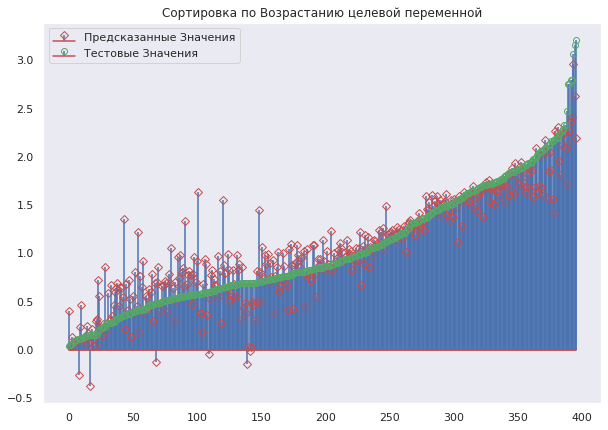

In [265]:
fig=plt.figure(figsize=(10, 7))
sorted = np.argsort(y_val)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_val[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();

# Делаем предсказание

In [266]:
import numpy as np

In [267]:
LR.predict(X_test)

array([ 1.30076584,  0.85490191,  1.54164919,  1.58601592,  1.37480711,
        0.51959923,  0.48254658,  1.52504766,  1.39928558,  0.70383658,
        0.63810763,  1.60354858,  2.08597881,  0.3299152 ,  2.27610262,
        2.05276405,  2.08050217,  0.94097775,  0.84124755,  0.89802287,
        0.9457862 ,  2.04979454,  1.78376159,  0.90911962,  0.73496346,
        0.59413903,  0.6510861 ,  2.2557926 ,  0.92526267,  1.57056079,
        1.21236752,  0.06988928, -0.55913045,  1.39424926,  0.79782678,
        0.25968447,  0.8702929 ,  0.62088216,  1.09201614,  0.99239   ,
        1.16502136,  1.80126265,  0.56098783,  0.68256701,  0.25799954,
        0.78602135,  1.1088557 ,  1.11820313,  1.56429161,  1.00618255,
        1.50893915,  0.69965823,  1.21739135,  0.9168464 ,  1.584115  ,
        1.49792208,  0.8735518 ,  0.46481763,  1.67273853,  0.67552813,
        1.75918865,  1.16515607,  1.09067106,  0.95908827,  1.08360873,
        1.03092593,  1.22292284,  1.68400883,  1.01171404,  0.67

In [268]:

Submission['polution'] = LR.predict(X_test)

In [269]:
Submission

,polution
index,
202,1.300766
395,0.854902
725,1.541649
770,1.586016
771,1.374807
...,...
19438,2.086982
19462,1.544432
19625,0.113121


Отправляем предсказание на кегл

In [270]:
Submission.to_csv('/content/My_Submission.csv',index=True)

In [272]:
!kaggle competitions submit -c urfu-engai-ml-2022-regression -f My_Submission.csv -m "ohe"

100% 5.23k/5.23k [00:00<00:00, 11.5kB/s]
Successfully submitted to UrFU_EngAI_ML_2022_Regression